Курсовая работа

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.cbook as cbook 
import matplotlib.dates as mdates 
import numpy as np 
import pandas as pd  
import torch  
from torch.utils.data import Dataset, DataLoader 
data = pd.read_csv('marketing_campaign.csv', sep="\t")
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
median_income = data['Income'].median()
data.loc[:, 'Income'] = data['Income'].fillna(median_income)

In [68]:
class CustomerDataset(Dataset):  
    def __init__(self, file_path):  
        self.data = pd.read_csv(file_path)  

    def __len__(self):  
        return len(self.data)  

    def __getitem__(self, idx):  
        if torch.is_tensor(idx):  
            idx = idx.tolist()  
            
        # Получаем строку данных  
        sample = self.data.iloc[idx]  
        
        # Преобразуем pandas.Series в словарь  
        sample_dict = sample.to_dict()  
        
        # Возвращаем словарь с данными  
        return sample_dict  

# Загрузка данных  
dataset = CustomerDataset('marketing_campaign.csv')  
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  

# Пример итерации по данным  
for i, data in enumerate(dataloader):  
    print(data)  
    print('\n')  
    if i == 1:  
        break  

{'ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse': ['610\t1953\tPhD\tTogether\t53593\t1\t1\t07-08-2012\t60\t349\t4\t78\t6\t0\t43\t8\t7\t2\t6\t8\t0\t0\t0\t0\t0\t0\t3\t11\t0', '10955\t1964\tGraduation\tWidow\t85620\t0\t0\t07-01-2014\t68\t416\t46\t925\t60\t107\t46\t1\t3\t6\t4\t1\t0\t0\t0\t0\t0\t0\t3\t11\t1', '10203\t1990\tGraduation\tSingle\t26095\t1\t0\t30-06-2013\t77\t11\t7\t9\t3\t1\t11\t1\t1\t0\t3\t7\t0\t0\t0\t0\t0\t0\t3\t11\t0', '2815\t1975\tGraduation\tMarried\t33183\t1\t0\t24-02-2014\t46\t7\t5\t39\t17\t15\t37\t2\t4\t0\t3\t7\t0\t0\t0\t0\t0\t0\t3\t11\t0', '10991\t1960\tMaster\tMarried\t89058\t0\t0\t07-12-2012\t18\t454\t194\t106\t31\t22\t43\t1\t5\t4\

In [11]:
total_records = data.shape[0]  # Количество записей  
total_fields = data.shape[1]  # Количество полей  
record_size_bytes = data.memory_usage(deep=True).sum() / total_records  # Объем одной записи в байтах  
record_size_bits = record_size_bytes * 8  # Объем одной записи в битах  
num_features = len(data.columns)  # Количество фичей  
missing_values = data.isnull().sum().sum()  # Общее количество пропусков  

# Процент разбиения на классы  
class_distribution = data['Marital_Status'].value_counts(normalize=True) * 100  # Предполагаем, что 'Gender' - это целевая переменная  
percent_distribution = class_distribution.to_string()  # Преобразование в строку для вывода  

# Типы данных  
data_types = data.dtypes  

# Вывод результатов  
print(f"Количество записей: {total_records}")  
print(f"Количество полей: {total_fields}")  
print(f"Объем одной записи в битах: {record_size_bits:.2f} бит")  
print(f"Количество фичей: {num_features}")  
print(f"Количество пропусков: {missing_values}")  
print("Процент разбиения на классы:\n", percent_distribution)  
print("Типы данных:\n", data_types)  

Количество записей: 2240
Количество полей: 29
Объем одной записи в битах: 3037.21 бит
Количество фичей: 29
Количество пропусков: 0
Процент разбиения на классы:
 Marital_Status
Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Типы данных:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3  

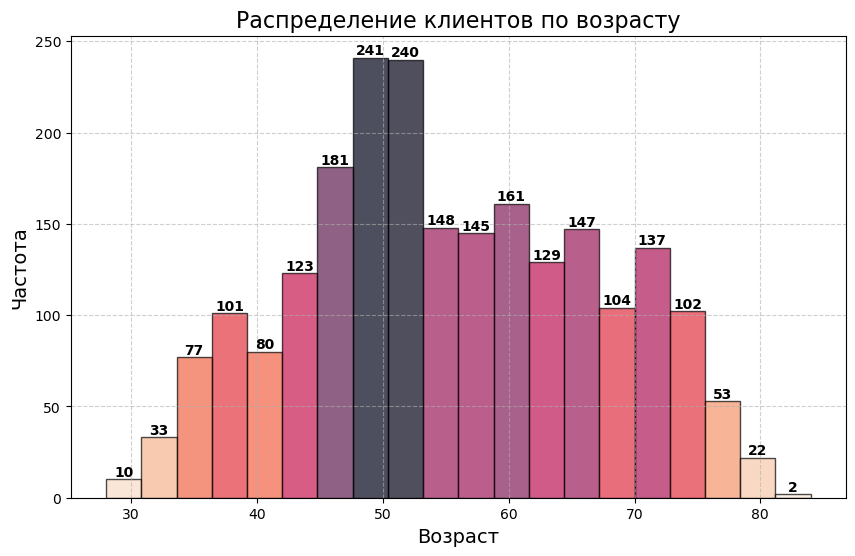

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

median_income = data['Income'].median()
data.loc[:, 'Income'] = data['Income'].fillna(median_income)

data['Age'] = 2024 - data['Year_Birth']

plt.figure(figsize=(10, 6))

# Normalize color by the bar height
n, bins, patches = plt.hist(data['Age'], bins=20, color='blue', alpha=0.7, edgecolor='black')
for i in range(len(patches)):
    patches[i].set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(n[i] / max(n)))
    if n[i] > 0:
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i], int(n[i]), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Распределение клиентов по возрасту', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [5]:
data = data[(data['Income'] <= 300000) & (data['Age'] <= 90)]

In [13]:
total_customers = len(data['Income'].dropna())
high_income_customers = len(data[data['Income'] > 100000])
percentage_high_income = (high_income_customers / total_customers) * 100

print(f"Процент клиентов с доходом выше 100 000: {percentage_high_income:.2f}%")

Процент клиентов с доходом выше 100 000: 0.54%


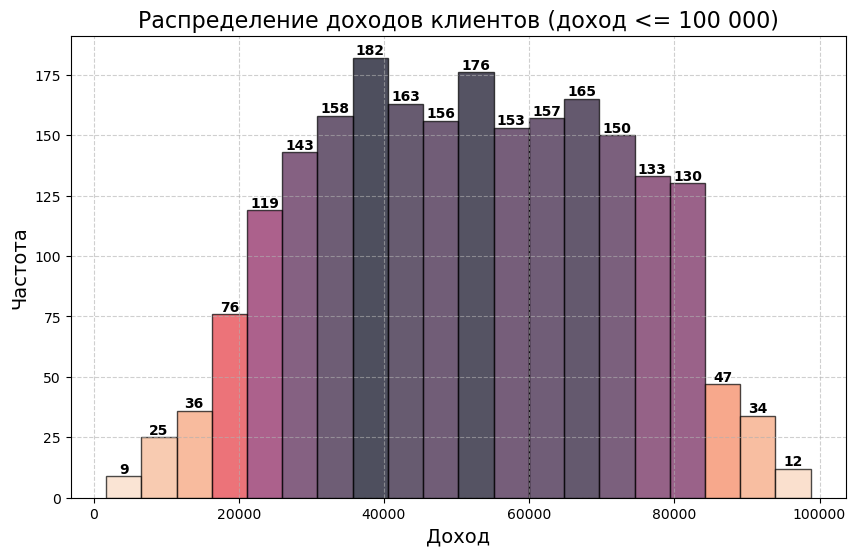

In [17]:
data_filtered = data[data['Income'] <= 100000]

plt.figure(figsize=(10, 6))

n, bins, patches = plt.hist(data_filtered['Income'].dropna(), bins=20, color='blue', alpha=0.7, edgecolor='black')
for i in range(len(patches)):
    patches[i].set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(n[i] / max(n)))
    if n[i] > 0:
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i], int(n[i]), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Распределение доходов клиентов (доход <= 100 000)', fontsize=16)
plt.xlabel('Доход', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [29]:
le = LabelEncoder()

data['Education'] = le.fit_transform(data['Education'])
data['Marital_Status'] = le.fit_transform(data['Marital_Status'])

In [31]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,4,3,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43


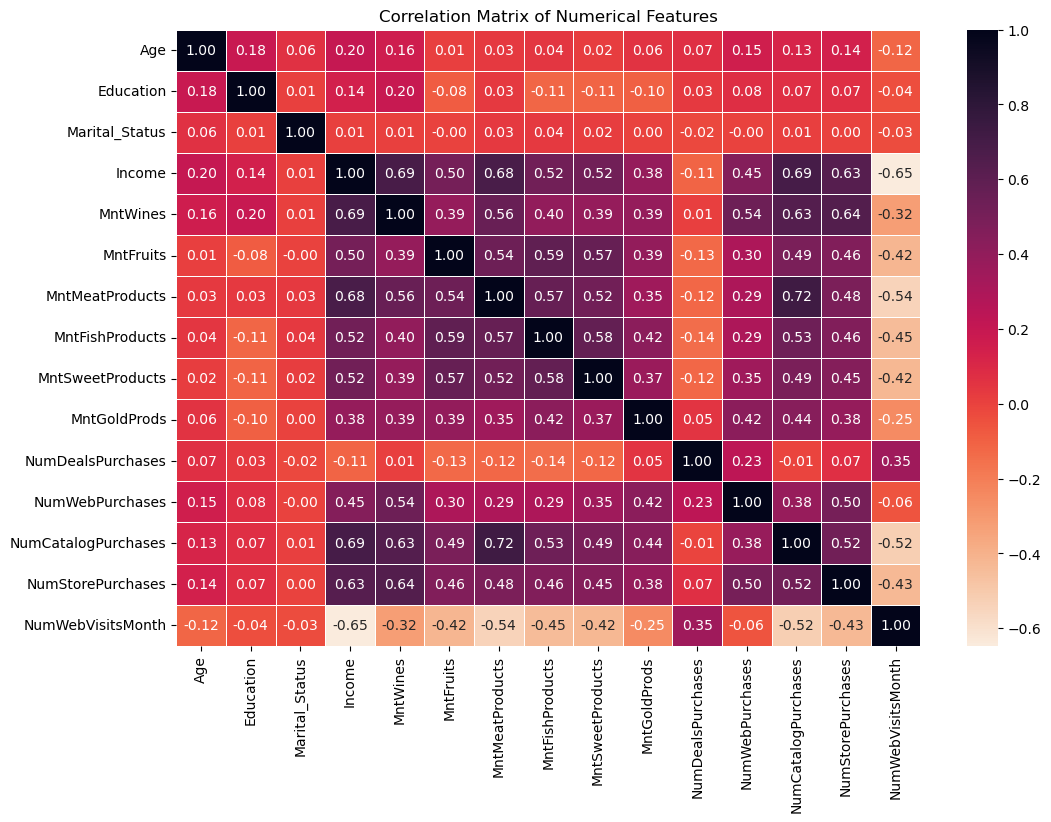

In [33]:
numerical_cols = ['Age', 'Education', 'Marital_Status', 'Income', 'MntWines', 
                  'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                  'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                  'NumWebVisitsMonth']

corr_matrix = data[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='rocket_r', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Total_Spend', data=data, s=100, color='#781C68') 
plt.title('Clusters of Customers (Income vs. Total Spending)')
plt.show()

ValueError: Could not interpret value `Total_Spend` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

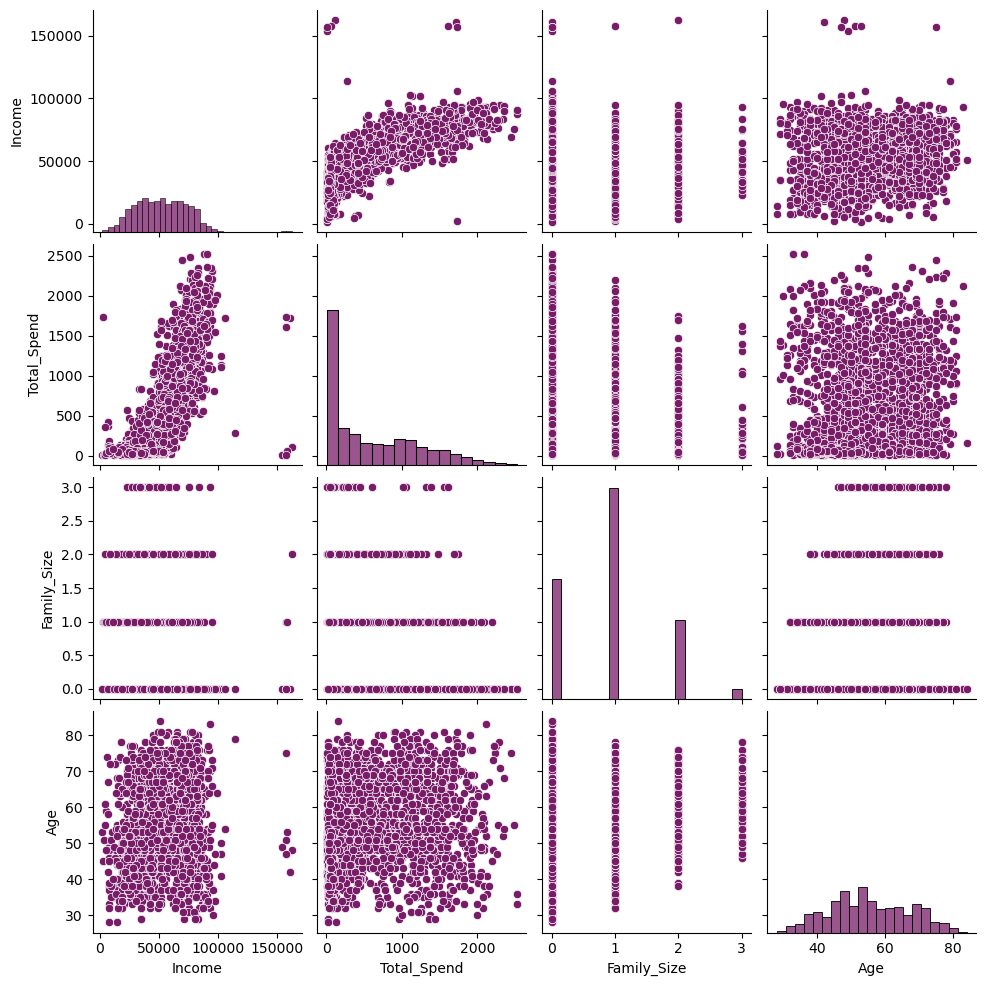

In [47]:
plt.figure(figsize=(8, 6))
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spend'] = data[product_columns].sum(axis=1)
data['Family_Size'] = data['Kidhome'] + data['Teenhome']
sns.pairplot(data[['Income', 'Total_Spend', 'Family_Size', 'Age']],
             plot_kws={'color': '#781C68'},
             diag_kws={'color': '#781C68', 'fill': True}) 
plt.show()

In [43]:
data['Family_Size'] = data['Kidhome'] + data['Teenhome']

data['Avg_Spend_Per_Purchase'] = data['Total_Spend'] / (data['NumDealsPurchases'] + data['NumWebPurchases'] + 
                                                    data['NumCatalogPurchases'] + data['NumStorePurchases'])
data['Wine_Ratio'] = data['MntWines'] / data['Total_Spend']
data['Meat_Ratio'] =data['MntMeatProducts'] / data['Total_Spend']
data['Fruit_Ratio'] = data['MntFruits'] / data['Total_Spend']
data['Total_Accepted_Campaigns'] = (data['AcceptedCmp1'] + data['AcceptedCmp2'] + 
                                  data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'])
data['Total_Spend'] = df_cust[product_columns].sum(axis=1)

KeyError: 'Total_Spend'

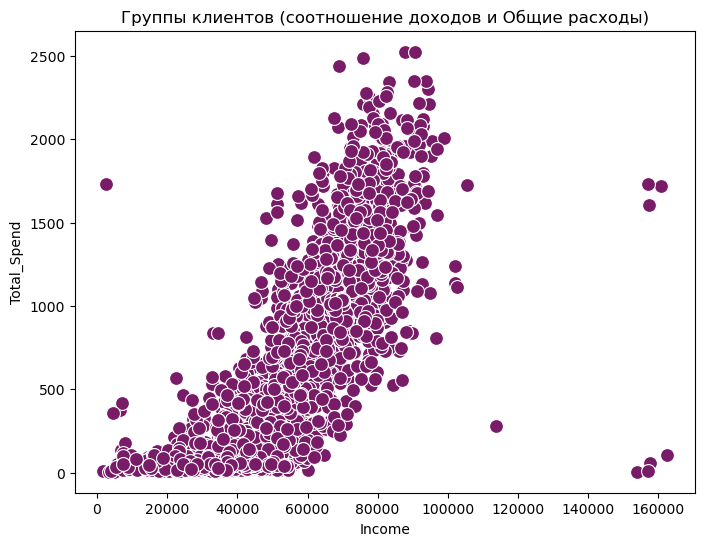

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Total_Spend', data=data, s=100, color='#781C68') 
plt.title('Группы клиентов (соотношение доходов и Общие расходы)')
plt.show()

C:\Users\Alexs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Alexs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Alexs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Alexs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

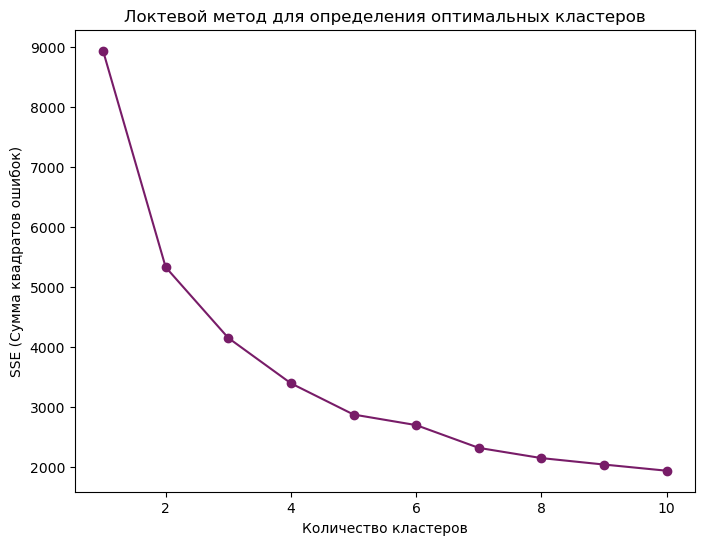

In [65]:
features = ['Income', 'Total_Spend', 'Age', 'Family_Size']

# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Convert the scaled data back to a DataFrame (optional, for easy manipulation)
scaled_data = pd.DataFrame(scaled_features, columns=features)

sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', color='#781C68')
plt.xlabel('Количество кластеров')
plt.ylabel('SSE (Сумма квадратов ошибок)')
plt.title('Локтевой метод для определения оптимальных кластеров')
plt.show()

In [69]:
optimal_clusters = 3

# Running K-Means with the chosen number of (optimal) clusters
kmeans = KMeans(n_clusters=optimal_clusters,n_init=20, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\Alexs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


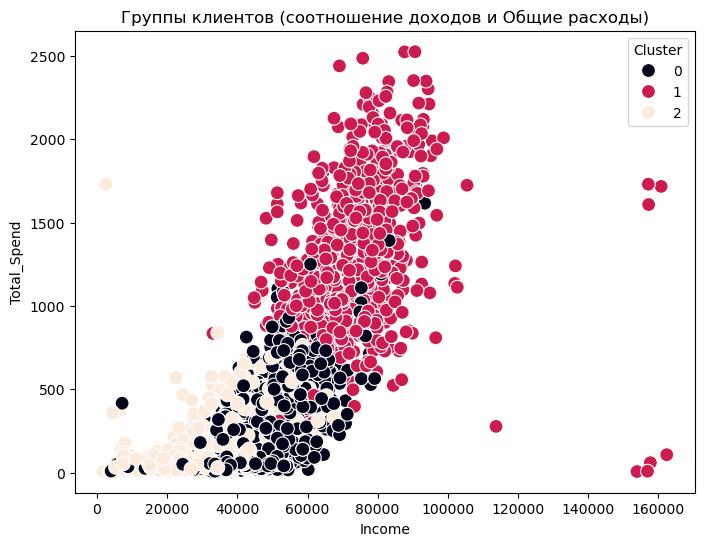

In [73]:
# Scatter plot to visualize the clusters based on Income and Total Spend
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Total_Spend', hue='Cluster', data=data, palette='rocket', s=100)
plt.title('Группы клиентов (соотношение доходов и Общие расходы)')
plt.show()

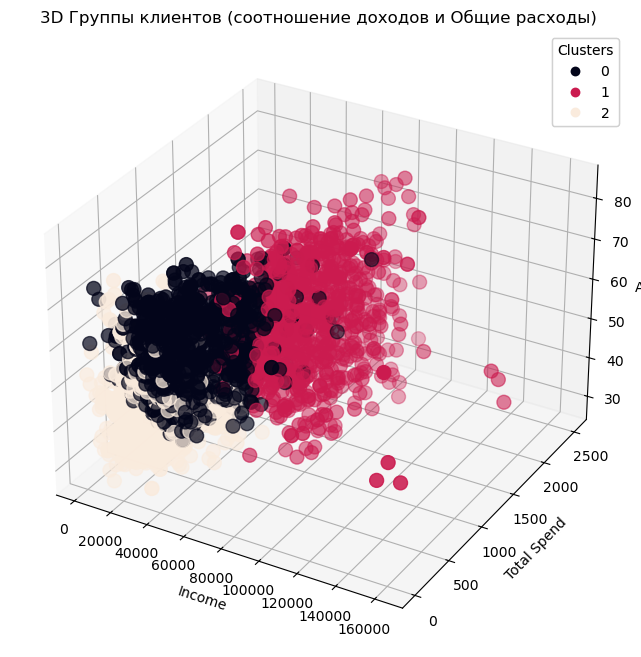

In [81]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['Income'], data['Total_Spend'], data['Age'], 
                     c=data['Cluster'], cmap='rocket', s=100)

ax.set_xlabel('Income')
ax.set_ylabel('Total Spend')
ax.set_zlabel('Age')
plt.title('3D Группы клиентов (соотношение доходов и Общие расходы)')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

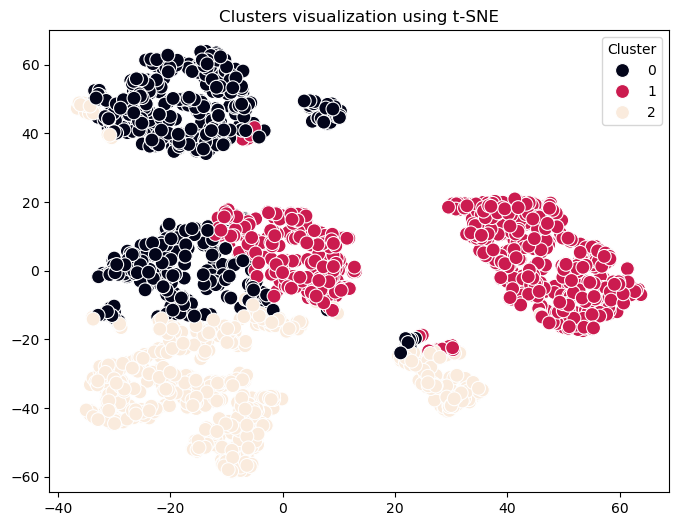

In [87]:
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue=data['Cluster'], palette='rocket', s=100)
plt.title('Clusters visualization using t-SNE')
plt.show()

In [95]:
silhouette_avg = silhouette_score(scaled_data, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.315362976944745


In [97]:
db_score = davies_bouldin_score(scaled_data, data['Cluster'])
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 1.1600289706730056


In [99]:
ch_score = calinski_harabasz_score(scaled_data, data['Cluster'])
print(f'Calinski-Harabasz Score: {ch_score}')

Calinski-Harabasz Score: 1286.3875821443255
